In [ ]:
# Import relevent modules/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
# Functions: 
def T_analytical(t): 
  return Ta + C*np.exp(-k*t) 

# Build function for Euler's method integration: 
def integrate_euler(F,y0,x0,xStop,h):
  x = np.arange(x0,xStop + h,h) 
  y = np.zeros(x.shape[0])
  for i in range(x.shape[0]): 
    if i == 0: 
      y[0] = y0
    elif i > 0: 
      y[i] = y[i-1] +F(y[i-1]) * h
  data = np.column_stack((x,y))
  return data

# Define function to be integrated: 
def Tdot(T): 
  return -k * (T - Ta)


In [ ]:
# Define model variables, parameters, etc. 
k = 0.019  # 1/min  rate constant
C = 50
T_init = 70 # deg C 
Ta = 20     # deg C
h = 2       # min

res = integrate_euler(Tdot,T_init,0,20,h)
res = pd.DataFrame(res,columns=['timestep','T_num'])
res

,timestep,T_num
0,0.0,70.000000
1,2.0,68.100000
2,4.0,66.272200
3,6.0,64.513856
4,8.0,62.822330
5,10.0,61.195081
6,12.0,59.629668
7,14.0,58.123741
8,16.0,56.675039
9,18.0,55.281387


In [ ]:
# Compare with analytical: 
T_analy = T_analytical(res.timestep)

res['T_analy'] = T_analy
res['RelError'] = np.abs(res.T_analy - res.T_num) / res.T_analy
res

,timestep,T_num,T_analy,RelError
0,0.0,70.000000,70.000000,0.000000
1,2.0,68.100000,68.135647,0.000523
2,4.0,66.272200,66.340810,0.001034
3,6.0,64.513856,64.612898,0.001533
4,8.0,62.822330,62.949414,0.002019
5,10.0,61.195081,61.347957,0.002492
6,12.0,59.629668,59.806213,0.002952
7,14.0,58.123741,58.321956,0.003399
8,16.0,56.675039,56.893043,0.003832
9,18.0,55.281387,55.517410,0.004251


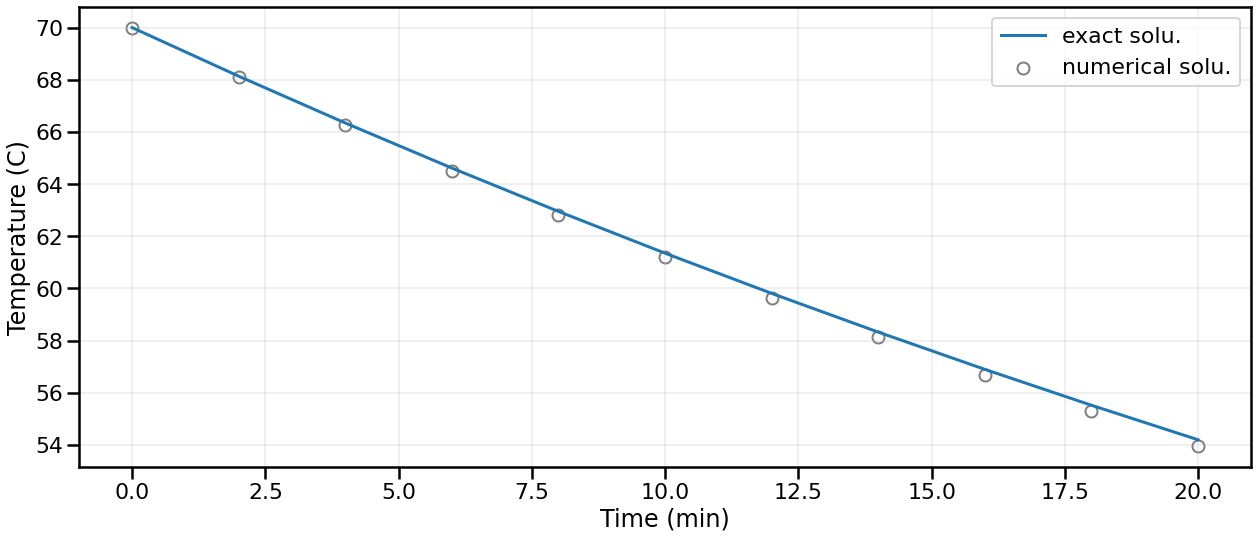

In [ ]:
# Plot
sb.set_context('poster')
fig,ax = plt.subplots(1,1,figsize=(18,8))
ax.plot(res.timestep,res.T_analy,label='exact solu.')
ax.scatter(res.timestep,res.T_num,fc='w',ec='k',alpha=0.5,label='numerical solu.')
ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Time (min)')
ax.grid(True,alpha=0.2)
ax.legend()

fig.tight_layout()